In [2]:
import numpy as np
%matplotlib inline
from matplotlib import rc
import matplotlib.pyplot as plt
from scipy import integrate
from decimal import Decimal
#plt.style.context("seaborn-whitegrid")
rc('text', usetex=True)
rc('font', size=18)
rc('legend', fontsize=15)
rc('text.latex', preamble=r'\usepackage{cmbright}')
import matplotlib.ticker as ticker
import math
from termcolor import colored
# fname="/Users/santoshkumar/Desktop/Physics Projects/LiCoO2/surface/Li Bands/1 side/structure 2/electron.txt"
# data = np.loadtxt(fname, delimiter="  ",skiprows=4,dtype="str")
# spin1=[]
# spin2=[]
# for i in data:
#     spin1.append(float(i[1]))
#     spin2.append(float(i[2]))

In [3]:
def get_num(s):
    newstr = ''.join((ch if ch in '0123456789.-eE' else ' ') for ch in s)
    listOfNumbers = [float(i) for i in newstr.split()]
    return np.array(listOfNumbers)




def get_spin_data(fname):
    values=[]
    fname_xsf=fname
    with open(fname_xsf, 'r') as file:
        data = file.read().split("\n")
    nabc=get_num (data[14])
    num_col=len(get_num(data[19]))
    
    for i in data[19:]:
        line=i.split(" ")
        if len(values)>=np.prod(nabc):
            break
        for j in line:
            try:
                values.append(float(j))
            except:
                None
    spinup=np.array(values).reshape(int(nabc[2]),int(nabc[0]),int(nabc[1]))
    values=[]
    for i in data[19+math.ceil(np.prod(nabc)/num_col)+21:]:
        line=i.split(" ")
        if len(values)>=np.prod(nabc):
            break
        for j in line:
            try:
                values.append(float(j))
            except:
                None
    spindown=np.array(values).reshape(int(nabc[2]),int(nabc[0]),int(nabc[1]))
    return spinup, spindown


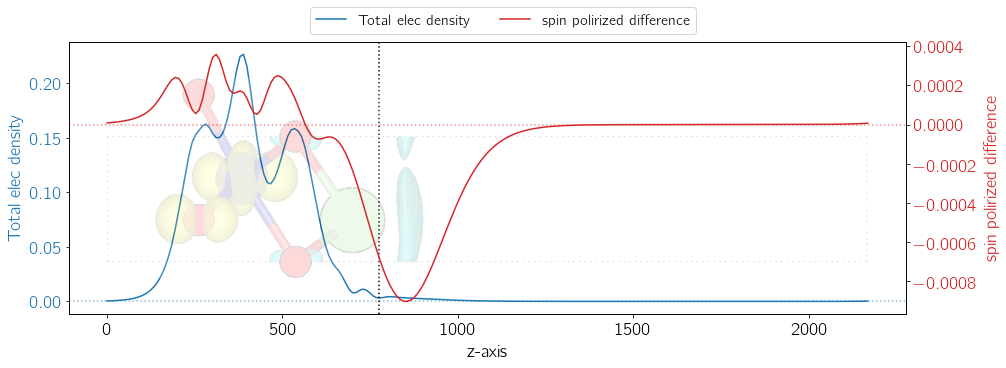

In [82]:
fname="/Users/santoshkumar/Desktop/Physics Projects/junk/den.coo2"
up,down=get_spin_data(fname)
def align_yaxis(ax1, v1, ax2, v2):
    """adjust ax2 ylimit so that v2 in ax2 is aligned to v1 in ax1"""
    _, y1 = ax1.transData.transform((0, v1))
    _, y2 = ax2.transData.transform((0, v2))
    inv = ax2.transData.inverted()
    _, dy = inv.transform((0, 0)) - inv.transform((0, y1-y2))
    miny, maxy = ax2.get_ylim()
    ax2.set_ylim(miny+dy, maxy+dy)
    

up_z=up.mean(axis=(1,2))
down_z=down.mean(axis=(1,2))
num_up_elec=np.format_float_scientific(np.trapz(up_z), precision=1)
num_down_elec=np.format_float_scientific(np.trapz(down_z), precision=1)

color_up="tab:blue"
color_down="tab:red"

fig,ax=plt.subplots(1,1,figsize=(15,5))
ax3 = ax.twinx()
im = plt.imread('cell.png')
ax3.imshow(im,alpha=.16,zorder=-1,aspect=1)
ax3.axis('off')
x=np.linspace(0,im.shape[1],len(up_z))


ax.plot(x,up_z,color=color_up,label="Total elec density")
ax.tick_params(axis='y', labelcolor=color_up)
ax.set_ylabel('Total elec density', color=color_up)
ax.axhline(0,0,1,color=color_up,alpha=.5,linestyle=":")
y_cut=775
ax.axvline(y_cut,color="black",linestyle=":")
ax2 = ax.twinx()
ax2.plot(x,down_z,color=color_down,label="spin polirized difference")
ax2.tick_params(axis='y', labelcolor=color_down)
ax2.set_ylabel('spin polirized difference', color=color_down)
ax2.axhline(0,0,1,color=color_down,alpha=.5,linestyle=":")
ax.set_xlabel("z-axis ")
fig.savefig('myimage.png', format='png', dpi=1200)
fig.legend(loc='upper center', ncol=2)

z_cut=np.sum(up,axis=(1,2))*(5.37230454**2*np.sqrt(3)/2)/(up.shape[1]**2)
elec=np.sum(z_cut[80:])*5.37230454*5.2763024/up.shape[0]
#print(elec)
#ax.text(1500,.20,elec)

plt.show()

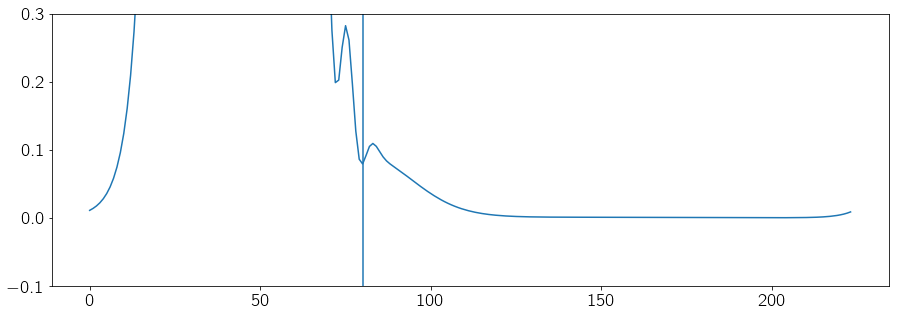

0.2399813656011


In [78]:
t=np.sum(up,axis=(1,2))*(5.37230454**2*np.sqrt(3)/2)/(up.shape[1]**2)
fig,ax=plt.subplots(1,1,figsize=(15,5))
plt.plot(t)
y=80
plt.axvline(y)
plt.ylim([-.1,.3])
plt.show()

print(np.sum(t[y:])*5.37230454*5.2763024/up.shape[0])

In [62]:
t=np.sum(up,axis=(1,2))*(5.37230454**2*np.sqrt(3)/2)/(up.shape[1]**2)
print(np.sum(t)*5.37230454*5.2763024/up.shape[0])

22.000000138991783


In [27]:
t=np.sum(down,axis=(1,2))*(5.37230454**2*np.sqrt(3)/2)/(18.**2)
print(np.sum(t)*5.37230454*5.2763024/96)

-0.053632780558441735


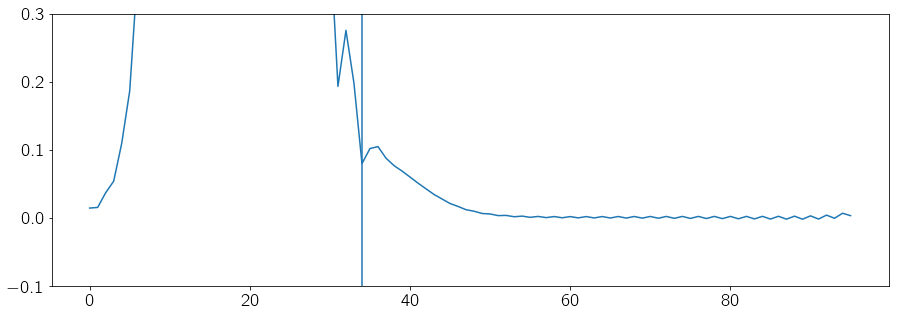

0.2527307045869913


In [55]:
t=np.sum(up,axis=(1,2))*(5.37230454**2*np.sqrt(3)/2)/(18.**2)
fig,ax=plt.subplots(1,1,figsize=(15,5))
plt.plot(t)
y=34
plt.axvline(y)
plt.ylim([-.1,.3])
plt.show()

print(np.sum(t[y:])*5.37230454*5.2763024/96)

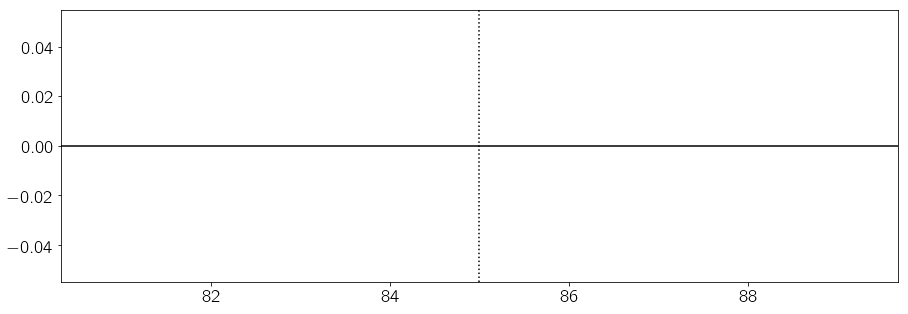

nan  spin diff above the plane 
nan e cm^2 
nan  total spin above the plane

##########################################

nan Spin up electrons above the plane
nan e cm^2 

##########################################

nan Spin down electrons above the plane
nan e cm^2 
nan


/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [65]:

fig,ax=plt.subplots(1,1,figsize=(15,5))
plane=85
plt.plot(up_z)
plt.axvline(plane,linestyle=":",color="black")
plt.axhline(0,linestyle="-",color="black")
plt.show()

convert=100000000*100000000*2.84290*2.84290


t_height=15*1.88973

height=plane*t_height/len(up_z)
elec_diff=-1*np.mean(up_z[plane:])*height
spin_diff_den=elec_diff*convert
print(elec_diff," spin diff above the plane ")

print( colored('{:.2e}'.format(spin_diff_den)+" e cm^2 ","green"))


elec_add=np.mean(down_z[plane:])*height
print(elec_add," total spin above the plane")



print("\n##########################################\n")

up=elec_diff+elec_add
print(up,"Spin up electrons above the plane")
val=up*convert
print( colored('{:.2e}'.format(val)+" e cm^2 ","red"))

print("\n##########################################\n")

down=-elec_diff+elec_add
print(down,"Spin down electrons above the plane")
val=down*convert
print( colored('{:.2e}'.format(val)+" e cm^2 ","blue"))

print(-1*np.mean(up_z[plane:])*height)

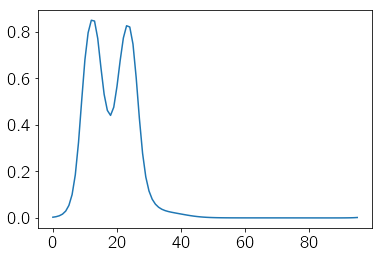

2.2138481548537396


0.09915468242616342

In [61]:
def integrate(up):
    a=2.842
    b=2.842
    c=15
    da=a/up.shape[1]
    db=b/up.shape[2]
    dc=c/up.shape[0]
    dA=da*db*np.cos(np.radians(30))
    z=up.sum(axis=(1,2))*dA
    total=np.sum(z)*dc
    plt.plot(z)
    plt.show()
    print(total)
integrate(down)
np.sum(down)*da*db*dc

In [82]:
up,down=get_spin_data(fname)
np.sum(down)*(5.37230454/18)*(5.37230454/18)*(5.37230454/96)

3.2715959551675744

In [56]:
kf=np.pi/(2*5.37230454)
e=kf**2/(2*np.pi)
r=e*1e16/(.529**2)
'{:.2e}'.format(r)

'4.86e+14'

In [57]:
e*(5.37230454**2)*np.sqrt(3)/2

0.3400873807939158

In [38]:
e

0.006047224898428412